**Name :**  Aditya Pulikal

**Qualification :** MSc Data Science and AI

**Topic :** A Comparative study on CNN, VGG16 and ResNet50
Architectures applied to image classification tasks using the CIFAR-10 dataset


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
print("Training Set Size: ", X_train.shape, y_train.shape)
print("Test Set Size: ", X_test.shape, y_test.shape)

Training Set Size:  (50000, 32, 32, 3) (50000, 1)
Test Set Size:  (10000, 32, 32, 3) (10000, 1)


In [ ]:
labels_map = {0: "Airplane",
              1: "Automobile",
              2: "Bird",
              3: "Cat",
              4: "Deer",
              5: "Dog",
              6: "Frog",
              7: "Horse",
              8: "Ship",
              9: "Truck"}

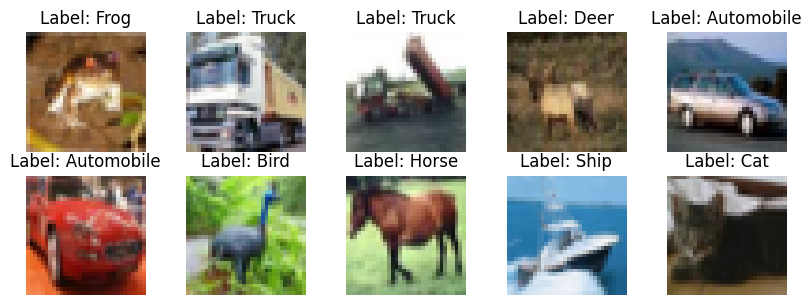

In [ ]:
# First 10 images
plt.figure(figsize=(10, 9))
for i in range(0, 10):
    ax = plt.subplot(5, 5, i+1)
    plt.title(f"Label: {labels_map[y_train[i][0]]}")
    plt.imshow(X_train[i], cmap="gray")
    plt.axis("off")

In [ ]:
train_labels, train_counts = np.unique(y_train, return_counts=True)
test_labels, test_counts = np.unique(y_test, return_counts=True)

train_class_number = pd.DataFrame({"Labels": train_labels, "Counts": train_counts})
test_class_number = pd.DataFrame({"Labels": test_labels, "Counts": test_counts})

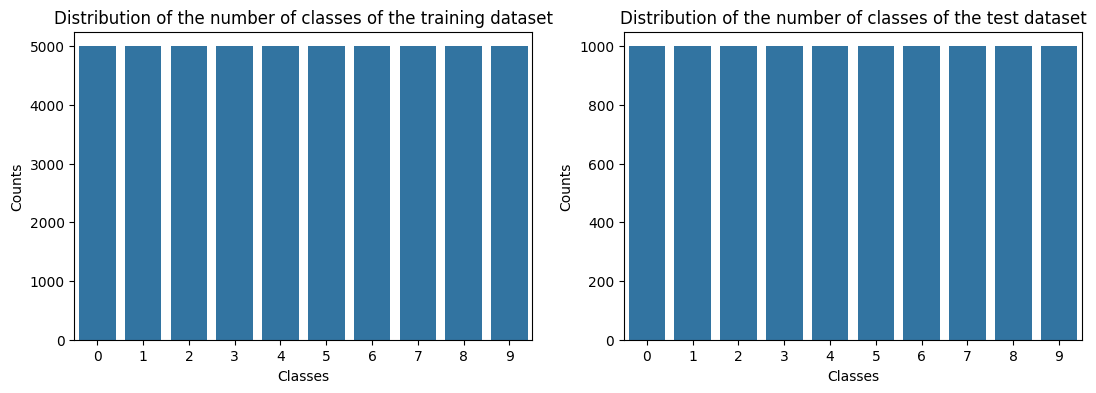

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(13,4))
sns.barplot(x="Labels", y="Counts", data=train_class_number, ax=ax[0])
ax[0].set_title("Distribution of the number of classes of the training dataset")
ax[0].set_xlabel("Classes")
ax[0].set_ylabel("Counts")

sns.barplot(x="Labels", y="Counts", data=test_class_number, ax=ax[1])
ax[1].set_title("Distribution of the number of classes of the test dataset")
ax[1].set_xlabel("Classes")
ax[1].set_ylabel("Counts")
plt.show()

In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_train[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             fill_mode='nearest',
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1)
train_generator = datagen.flow(X_train, y_train, batch_size=256)

**CNN model**

In [ ]:
model = Sequential()
model.add(Input(shape=(32, 32, 3)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=256, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))

model.add(Dense(units=128, activation="relu"))
model.add(BatchNormalization())

model.add(Dense(units=10, activation="softmax"))

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,8

 Total params: 409,290 (1.56 MB)

 Trainable params: 407,818 (1.56 MB)

 Non-trainable params: 1,472 (5.75 KB)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 50s 193ms/step - accuracy: 0.2694 - loss: 2.1157 - precision: 0.3786 - recall: 0.0934 - val_accuracy: 0.1138 - val_loss: 4.1378 - val_precision: 0.1570 - val_recall: 0.0519
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 32s 157ms/step - accuracy: 0.4399 - loss: 1.5350 - precision: 0.6229 - recall: 0.2230 - val_accuracy: 0.2140 - val_loss: 3.3798 - val_precision: 0.2537 - val_recall: 0.1593
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 152ms/step - accuracy: 0.4917 - loss: 1.3954 - precision: 0.6691 - recall: 0.2972 - val_accuracy: 0.3012 - val_loss: 2.6928 - val_precision: 0.3194 - val_recall: 0.2307
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 43s 161ms/step - accuracy: 0.5306 - loss: 1.2895 - precision: 0.6937 - recall: 0.3527 - val_accuracy: 0.5735 - val_loss: 1.2321 - val_precision: 0.6694 - val_recall: 0.4736
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 31s 155ms/step - accuracy: 0.5647 - loss: 1.2125 - precision: 0.7133 - recall: 0.3973 - val_accuracy: 0.6013

Text(0.5, 1.0, 'Training and Test Loss Graph')

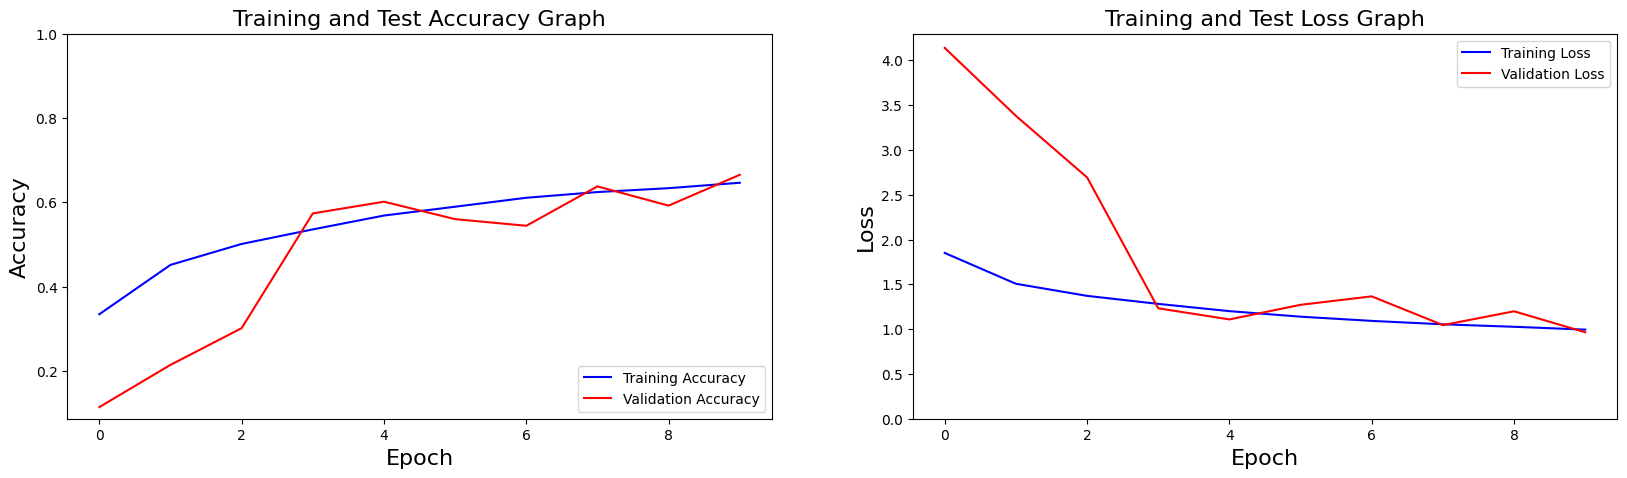

In [ ]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=(X_test, y_test))
# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=1)
print(f'Test accuracy: {scores[1]*100:.2f}%')

# Accuracy
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], color="b", label="Training Accuracy")
plt.plot(history.history["val_accuracy"], color="r", label="Validation Accuracy")
plt.legend(loc="lower right")
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.ylim([min(plt.ylim()), 1])
plt.title("Training and Test Accuracy Graph", fontsize=16)

# Loss
plt.subplot(1,2,2)
plt.plot(history.history["loss"], color="b", label="Training Loss")
plt.plot(history.history["val_loss"], color="r", label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.ylim([0, max(plt.ylim())])
plt.title("Training and Test Loss Graph", fontsize=16)

**VGG16**

In [ ]:
from tensorflow.keras.applications import VGG16
# Load the pre-trained VGG16 model (excluding the top classification layer)
vgg_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers of the base model (optional)
for layer in vgg_base_model.layers:
    layer.trainable = False

# Modify the VGG16 architecture to maintain the spatial dimensions (32x32)
x = vgg_base_model.output

# Flatten the output and add fully connected layers
x = Flatten()(x)  # Flattening the 32x32 feature map into a 1D vector
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)  # Final output layer with 10 classes

# Create the new model
custom_vgg_model = Model(inputs=vgg_base_model.input, outputs=output)

# Compile the model
custom_vgg_model.compile(loss='categorical_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])
# Print the model summary
custom_vgg_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 45s 194ms/step - accuracy: 0.3085 - loss: 1.9278 - val_accuracy: 0.4817 - val_loss: 1.4810
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 70s 162ms/step - accuracy: 0.4548 - loss: 1.5437 - val_accuracy: 0.5115 - val_loss: 1.3964
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 43s 171ms/step - accuracy: 0.4761 - loss: 1.4766 - val_accuracy: 0.5190 - val_loss: 1.3640
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 163ms/step - accuracy: 0.4876 - loss: 1.4464 - val_accuracy: 0.5241 - val_loss: 1.3511
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 32s 160ms/step - accuracy: 0.4982 - loss: 1.4216 - val_accuracy: 0.5344 - val_loss: 1.3239
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 42s 168ms/step - accuracy: 0.5013 - loss: 1.4017 - val_accuracy: 0.5357 - val_loss: 1.3055
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 169ms/step - accuracy: 0.5088 - loss: 1.3882 - val_accuracy: 0.5402 - val_loss: 1.2933
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 164ms/step - accuracy: 0.5112 - loss: 1

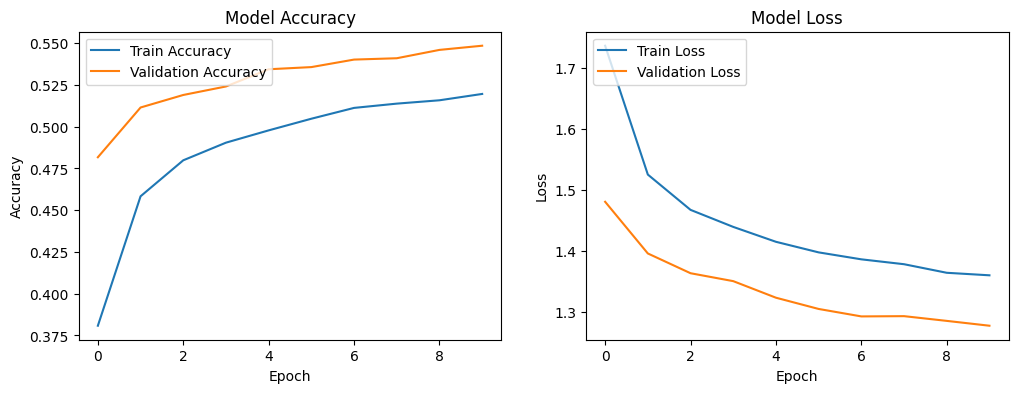

In [ ]:
#Train the model on the CIFAR-10 dataset and store the training history
history = custom_vgg_model.fit(train_generator,
                               epochs=10,
                               validation_data=(X_test, y_test))

# Evaluate the model
scores = custom_vgg_model.evaluate(X_test, y_test, verbose=1)
print(f'Test accuracy: {scores[1]*100:.2f}%')

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

# Show the plots
plt.show()

**Resnet**

In [ ]:
from tensorflow.keras.applications import ResNet50
# Load the pre-trained ResNet50 model (excluding the top classification layer)
resnet_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers of the base model (optional)
for layer in resnet_base_model.layers:
    layer.trainable = False

# Add custom layers to adapt the model for CIFAR-10 (retain spatial dimensions where possible)
x = resnet_base_model.output

x = Flatten()(x)  # Flatten the output to feed into fully connected layers
x = Dense(256, activation='relu')(x)  # Fully connected layer with 256 neurons
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
output = Dense(10, activation='softmax')(x)  # Final layer with 10 neurons (for 10 classes in CIFAR-10)

# Create the new model
custom_resnet_model = Model(inputs=resnet_base_model.input, outputs=output)

# Compile the model
custom_resnet_model.compile(loss='categorical_crossentropy',
                            optimizer='adam',
                            metrics=['accuracy'])
custom_resnet_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 38, 38, 3)      │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 16, 16, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 16, 16, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 16, 16, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 18, 18, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 8, 8, 64)       │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 8, 8, 64)       │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 8, 8, 64)       │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 8, 8, 256)      │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 8, 8, 256)      │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 24,114,826 (91.99 MB)

 Trainable params: 527,114 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 54s 215ms/step - accuracy: 0.1169 - loss: 2.5017 - val_accuracy: 0.1802 - val_loss: 2.2587
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 32s 161ms/step - accuracy: 0.1536 - loss: 2.2560 - val_accuracy: 0.2273 - val_loss: 2.1738
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 158ms/step - accuracy: 0.1670 - loss: 2.2101 - val_accuracy: 0.2430 - val_loss: 2.1208
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 160ms/step - accuracy: 0.1763 - loss: 2.1817 - val_accuracy: 0.2527 - val_loss: 2.0898
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 158ms/step - accuracy: 0.1820 - loss: 2.1677 - val_accuracy: 0.2479 - val_loss: 2.0841
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 160ms/step - accuracy: 0.1873 - loss: 2.1563 - val_accuracy: 0.2593 - val_loss: 2.0937
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 42s 168ms/step - accuracy: 0.1877 - loss: 2.1487 - val_accuracy: 0.2644 - val_loss: 2.0326
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 32s 159ms/step - accuracy: 0.1958 - loss: 2

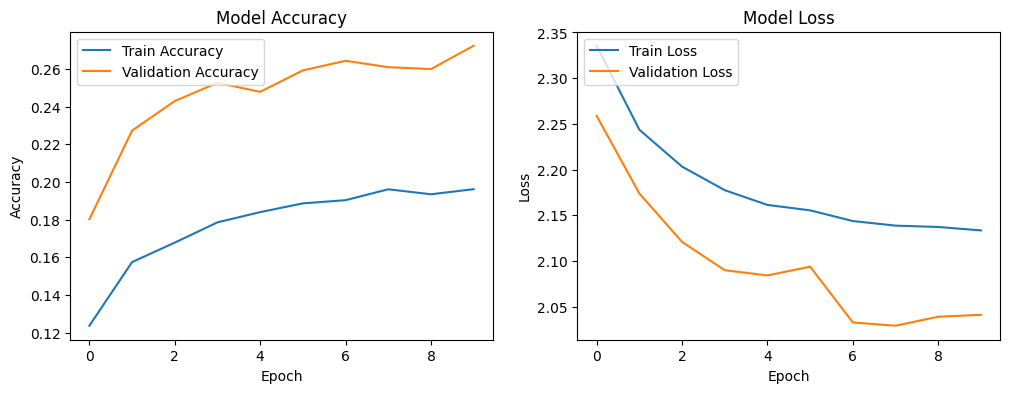

In [ ]:
# Train the model on the CIFAR-10 dataset and store the training history
history = custom_resnet_model.fit(train_generator,
                                  epochs=10,
                                  validation_data=(X_test, y_test))

# Evaluate the model
scores = custom_resnet_model.evaluate(X_test, y_test, verbose=1)
print(f'Test accuracy: {scores[1]*100:.2f}%')

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

# Show the plots
plt.show()

**Confusion Matrix of the best model**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[7 8 8 ... 5 6 7]
[3 8 8 ... 5 1 7]
(10000,) (10000,)


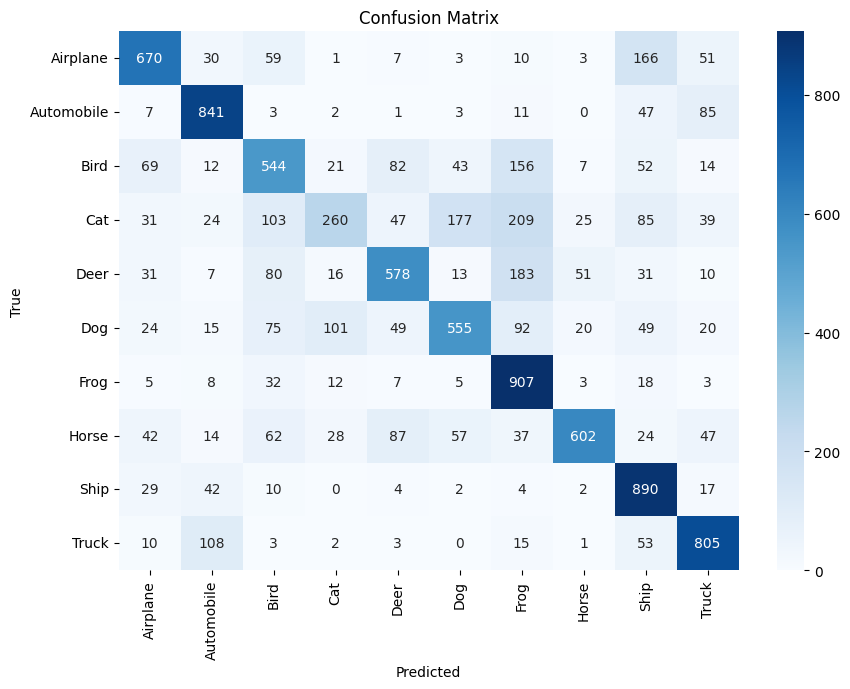

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred_classes)

if len(y_test.shape) > 1 and y_test.shape[1] != 1:
    y_test = np.argmax(y_test, axis=1)
print(y_test)

y_test_ = np.vectorize(labels_map.get)(y_test)
y_pred_classes = np.vectorize(labels_map.get)(y_pred_classes)

print(y_test_.shape,y_pred_classes.shape)

labels = np.unique(np.concatenate((y_test_, y_pred_classes)))

cm = confusion_matrix(y_test_, y_pred_classes, labels=labels)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**Comparison**

In [ ]:
import pandas as pd

data = {
    'Model': ['CNN', 'VGG16', 'ResNet50'],
    'Time Taken (approx.)': ['Fast', 'Moderate', 'Slow'],
    'Accuracy (approx.)': ['75%', '55%', '27%'],
    'Storage Used (approx.)': ['Low', 'Moderate', 'High']
}

df = pd.DataFrame(data)
print(df)

      Model Time Taken (approx.) Accuracy (approx.) Storage Used (approx.)
0       CNN                 Fast                75%                    Low
1     VGG16             Moderate                55%               Moderate
2  ResNet50                 Slow                27%                   High


**Predictions**

Mounted at /content/drive


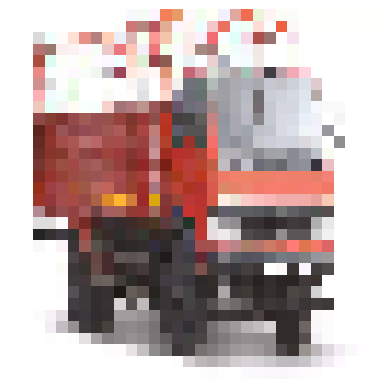

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step
Predicted class: Truck


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/drive/MyDrive/truck.jpg'
img = image.load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.axis('off')
plt.show()

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

print(f"Predicted class: {labels_map[predicted_class]}")


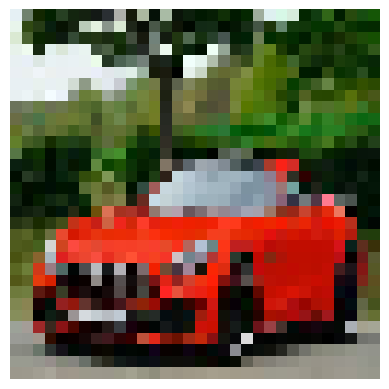

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted class: Automobile


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = '/content/drive/MyDrive/car1.jpg'

img = image.load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.axis('off')
plt.show()

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

print(f"Predicted class: {labels_map[predicted_class]}")


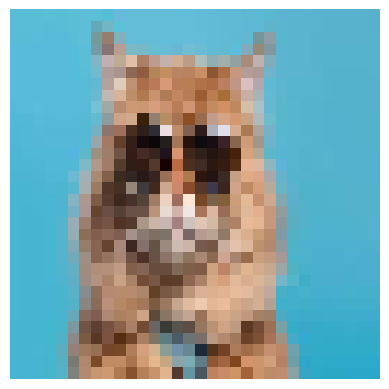

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted class: Bird


In [ ]:
# prompt: do the same thing for an image of a cat....I also want to show the image in this case

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = '/content/drive/MyDrive/cat.jpg'

img = image.load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.axis('off')
plt.show()

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

print(f"Predicted class: {labels_map[predicted_class]}")
